## Chapter 2. Getting started: Fun with data and visualizations
#### Notebook for Python

Van Atteveldt, W., Trilling, D. & Arcila, C. (2022). <a href="https://cssbook.net" target="_blank">Computational Analysis of Communication</a>. Wiley.

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ccs-amsterdam/ccsbook/blob/master/chapter02/funwith_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
</table>

In [1]:
!pip3 install pandas matplotlib  geopandas 
!pip3 install descartes shifterator
!pip3 install wordcloud gensim nltk networkx

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from wordcloud import WordCloud
from gensim import corpora, models
import geopandas as gpd
import shifterator as sh
import nltk
from nltk.corpus import stopwords
import networkx as nx

In [7]:
tw=pd.read_csv("https://cssbook.net/d/covid.csv")
tw.head()

,status_id,created_at,screen_name,lang,location,text,retweet_count,reply_to_screen_name
0,1309535775109926912,2020-09-25T16:50:33Z,ghulamabbasshah,en,"Lahore, Pakistan",Secularism of #Gandhi and #Nehru in #India has...,1203,NaN
1,1309626010221129729,2020-09-25T22:49:07Z,GeoRebekah,en,"Florida, USA",On the day @GovRonDeSantis rejects the experts...,1146,NaN
2,1309578234007257088,2020-09-25T19:39:16Z,AlexBerenson,en,New York,Updated @cgcgov figures: 66 children under 15 ...,988,NaN
3,1309557875296083969,2020-09-25T18:18:22Z,AlexBerenson,en,New York,No mo ro in Flo: @govrondesantis proves again ...,953,NaN
4,1309643186827132929,2020-09-25T23:57:22Z,B52Malmet,en,"New York, NY",Dr. Fauci warns the worst public health crisis...,946,NaN


<AxesSubplot:xlabel='created_at'>

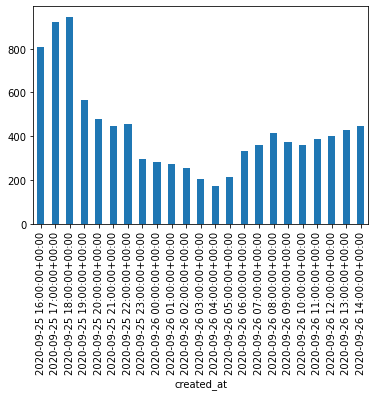

In [8]:
tw.index=pd.DatetimeIndex(tw["created_at"])
tw["status_id"].groupby(pd.Grouper(freq="H")) \
    .count().plot(kind="bar")
# (note the use of \ to split a long line)

(-0.5, 399.5, 199.5, -0.5)

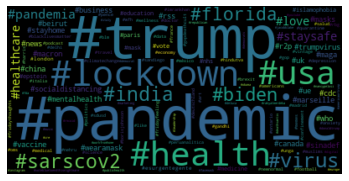

In [9]:
freq = defaultdict(int)
for tweet in tw["text"]:
    for tag in re.findall("#\w+", tweet.lower()):
        if not re.search("#covid|#corona", tag):
            freq[tag]+=1
wc = WordCloud().generate_from_frequencies(freq)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [10]:
tags = [[tag.lower() 
         for tag in re.findall("#\w+", tweet)] 
        for tweet in tw["text"]]
voca = corpora.Dictionary(tags)
corpus = [voca.doc2bow(doc) for doc in tags]
m = models.LdaModel(corpus, num_topics=10,
  id2word=voca,
  distributed=False, random_state=123)
m.print_topics()

[(0,
  '0.030*"#coviduk" + 0.019*"#covid" + 0.010*"#lockdown2" + 0.007*"#police" + 0.006*"#crisis" + 0.005*"#dengue" + 0.004*"#portland" + 0.004*"#durango" + 0.004*"#salerno" + 0.003*"#politica"'),
 (1,
  '0.132*"#covid" + 0.016*"#salud" + 0.012*"#blm" + 0.008*"#fridayvibes" + 0.006*"#africa" + 0.006*"#safety" + 0.005*"#sugar" + 0.005*"#ethanol" + 0.005*"#francia" + 0.005*"#rbob"'),
 (2,
  '0.105*"#covid" + 0.030*"#vaccine" + 0.029*"#lockdown" + 0.014*"#quarantine" + 0.008*"#campania" + 0.007*"#sports" + 0.007*"#economy" + 0.007*"#unga" + 0.006*"#unemployment" + 0.006*"#covidtesting"'),
 (3,
  '0.151*"#covid" + 0.112*"#covid19" + 0.067*"#coronavirus" + 0.048*"#covid_19" + 0.045*"#corona" + 0.023*"#covidー19" + 0.012*"#biden" + 0.010*"#sarscov2" + 0.009*"#covid__19" + 0.007*"#coronainfoch"'),
 (4,
  '0.664*"#covid" + 0.010*"#covidー19" + 0.005*"#covidiots" + 0.005*"#masks" + 0.004*"#cdc" + 0.004*"#covid19" + 0.004*"#podcast" + 0.003*"#marseille" + 0.003*"#nhs" + 0.003*"#youtube"'),
 (5,
 

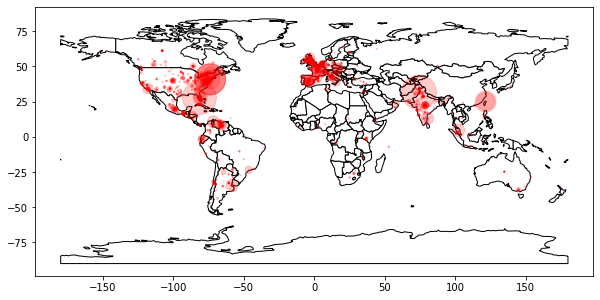

In [11]:
url = "https://cssbook.net/d/covid_users.csv"
users = pd.read_csv(url)
tw2 = tw.merge(users,on="screen_name",how="left")
world = gpd.read_file(
  gpd.datasets.get_path("naturalearth_lowres"))
gdf = gpd.GeoDataFrame(tw2, 
  geometry=gpd.points_from_xy(tw2.long, tw2.lat))
ax = world.plot(color="white", edgecolor="black", 
                figsize=(10,10))
gdf.plot(ax=ax, color="red", alpha=.2,
         markersize=tw["retweet_count"])
plt.show()

In [13]:
tw2

,status_id,created_at,screen_name,lang,location_x,text,retweet_count,reply_to_screen_name,location_y,lat,long,geometry
0,1309535775109926912,2020-09-25T16:50:33Z,ghulamabbasshah,en,"Lahore, Pakistan",Secularism of #Gandhi and #Nehru in #India has...,1203,NaN,"Lahore, Pakistan",31.565682,74.314183,POINT (74.31418 31.56568)
1,1309626010221129729,2020-09-25T22:49:07Z,GeoRebekah,en,"Florida, USA",On the day @GovRonDeSantis rejects the experts...,1146,NaN,"Florida, USA",27.756767,-81.463983,POINT (-81.46398 27.75677)
2,1309578234007257088,2020-09-25T19:39:16Z,AlexBerenson,en,New York,Updated @cgcgov figures: 66 children under 15 ...,988,NaN,New York,40.712728,-74.006015,POINT (-74.00602 40.71273)
3,1309557875296083969,2020-09-25T18:18:22Z,AlexBerenson,en,New York,No mo ro in Flo: @govrondesantis proves again ...,953,NaN,New York,40.712728,-74.006015,POINT (-74.00602 40.71273)
4,1309643186827132929,2020-09-25T23:57:22Z,B52Malmet,en,"New York, NY",Dr. Fauci warns the worst public health crisis...,946,NaN,"New York, NY",40.712728,-74.006015,POINT (-74.00602 40.71273)
...,...,...,...,...,...,...,...,...,...,...,...,...
9806,1309525621719138305,2020-09-25T16:10:12Z,YouActProject,en,National,“75% of all emerging infectious diseases are z...,0,NaN,National,39.583972,-80.037569,POINT (-80.03757 39.58397)
9807,1309525615243128839,2020-09-25T16:10:11Z,healthrak,en,Nigeria,TGIF!!!\n\nHealthlthrak wishes you a happy and...,0,NaN,Nigeria,9.600036,7.999972,POINT (7.99997 9.60004)
9808,1309525598394515456,2020-09-25T16:10:07Z,LVcomer,es,"Barcelona, Spain",Si este año el mundo se ha paralizado por la i...,0,NaN,"Barcelona, Spain",41.382894,2.177432,POINT (2.17743 41.38289)
9809,1309525598197473283,2020-09-25T16:10:07Z,RONIRAX,pt,NaN,@cartolafc vocês já colocaram o #Covid para se...,0,cartolafc,NaN,NaN,NaN,POINT (nan nan)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlosarcila/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/carlosarcila/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


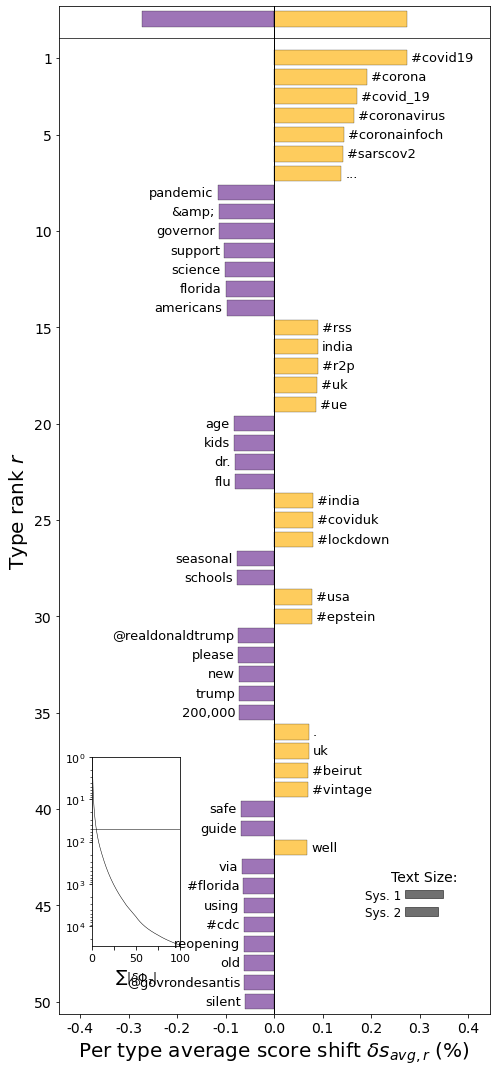

In [8]:
nltk.download("stopwords")
cn = gdf.query("lang=='en'&(long<-60 & lat>25)")
cn = Counter(cn["text"].str.cat().lower().split())
cr = gdf.query("lang=='en' & (long>-60 | lat<25)")
cr = Counter(cr["text"].str.cat().lower().split())
for k in stopwords.words("english"):
    del cn[k]
    del cr[k]
key = sh.ProportionShift(type2freq_1=cn,
                         type2freq_2=cr)
key.get_shift_graph()

In [9]:
edges=tw2[["screen_name","reply_to_screen_name"]]
edges=edges.dropna().rename({"screen_name":"from",
  "reply_to_screen_name":"to"}, axis="columns")
edges.groupby(["from","to"]).size().head()

from            to            
007Vincentxxx   ilfattovideo      1
06CotedUsure    ArianeWalter      1
1Million4Covid  1Million4Covid    3
                JustinTrudeau     1
1ctboy1         LegionPost13      1
dtype: int64

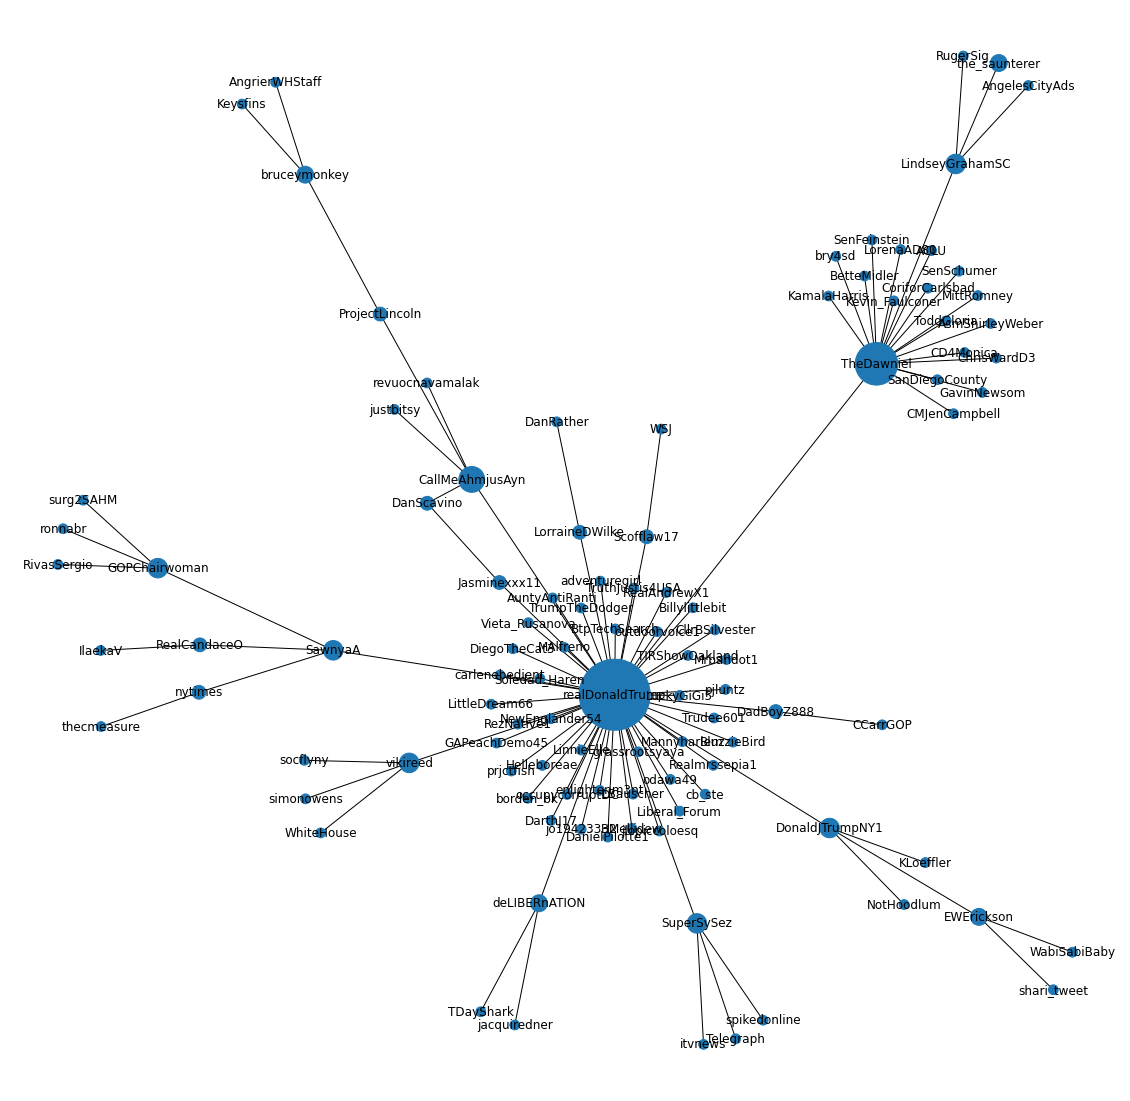

In [10]:
g1 = nx.Graph()
g1.add_edges_from(edges.to_numpy())
largest = max(nx.connected_components(g1),key=len)
g2 = g1.subgraph(largest)

pos = nx.spring_layout(g2)
plt.figure(figsize=(20,20))
plt.axis("off")
sizes = [s*1e4 for s in 
  nx.centrality.degree_centrality(g2).values()]
nx.draw_networkx_nodes(g2,pos, node_size=sizes)
nx.draw_networkx_labels(g2,pos)
nx.draw_networkx_edges(g2,pos)
plt.show()

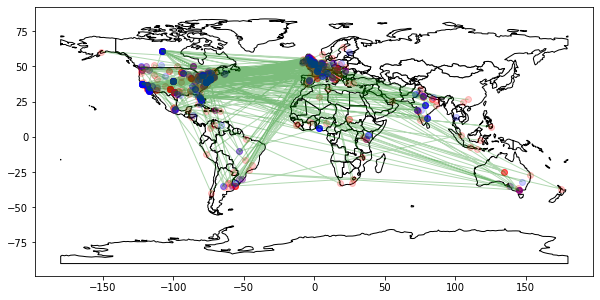

In [11]:
u = users.drop(["location"], axis=1)
uf = u.rename({"screen_name":"from",
    "lat":"lat_from","long":"long_from"}, axis=1)
ut = u.rename({"screen_name":"to",
    "lat":"lat_to","long":"long_to"}, axis=1)
edges = edges.merge(uf).merge(ut).query(
    "long_to!=long_from & lat_to!=lat_from")

world = gpd.read_file(
    gpd.datasets.get_path("naturalearth_lowres"))
g_to = gpd.GeoDataFrame(edges.copy(),
    geometry=gpd.points_from_xy(edges.long_to,
                                edges.lat_to))
g_from = gpd.GeoDataFrame(edges.copy(),
    geometry=gpd.points_from_xy(edges.long_from,
                                edges.lat_from))

ax = world.plot(color="white", edgecolor="black",
                figsize=(10,10))
g_from.plot(ax=ax, color="red", alpha=.2)
g_to.plot(ax=ax, color="blue", alpha=.2)

e=g_from.join(g_to, lsuffix="_from",rsuffix="_to")
e = e[["geometry_from", "geometry_to"]]
px = lambda point: point.x
py = lambda point: point.y
x_values = list(zip(e["geometry_from"].map(px),
                    e["geometry_to"].map(px)))
y_values = list(zip(e["geometry_from"].map(py),
                    e["geometry_to"].map(py)))
plt.plot(x_values, y_values, linewidth = 1,
    linestyle = "-", color = "green", alpha=.3)
plt.show()